In [14]:
# import os
# import pandas as pd

# # Define the folder and file name
# folder_name = ""  # Change if your folder name is different
# file_name = "Cleaned_ai_job_market_insights.csv"  # Change this to the file you want

# # Construct full path
# file_path = os.path.join(folder_name, file_name)

# # Check if the file exists
# if not os.path.exists(file_path):
#     print(f"🚨 Error: The file '{file_path}' does not exist! Check your folder and filename.")
# else:
#     print(f"✅ Loading file: {file_path}")
    
#     # Load the CSV
#     df = pd.read_csv(file_path)
    
#     # Display basic info
#     print(f"✅ Successfully loaded: {file_name}")
#     print(f"\n📊 Data Shape: {df.shape}")
#     print("\n🔍 First 5 rows:")
#     print(df.head())


In [15]:

# Define the file name (update this with your actual file)
folder_name = ""  # Using the current directory
file_name = "Cleaned_ai_job_market_insights.csv"  # Change this to your desired file

# Construct full path
file_path = os.path.join(folder_name, file_name)

# Check if the file exists
if not os.path.exists(file_path):
    print(f"🚨 Error: The file '{file_path}' does not exist! Check your folder and filename.")
else:
    print(f"✅ Loading file: {file_path}")
    
    # Load the CSV
    df = pd.read_csv(file_path)
    
    # Display basic info
    print(f"✅ Successfully loaded: {file_name}")
    print(f"\n📊 Data Shape: {df.shape}")
    print("\n🔍 First 5 rows:")
    print(df.head())


NameError: name 'os' is not defined

Available datasets:
- ai_job_market_insights
- ai_ml_jobs_linkedin
- analysis_ai_adoption
- career_change_prediction
- resume_data


Looking for file at: Cleaned_ai_job_market_insights.csv
Dataset loaded successfully from local storage.
Columns in dataset: Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High  

/tmp/ipykernel_18661/3662489357.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_counts, x='industry', y='job_count', palette='viridis')


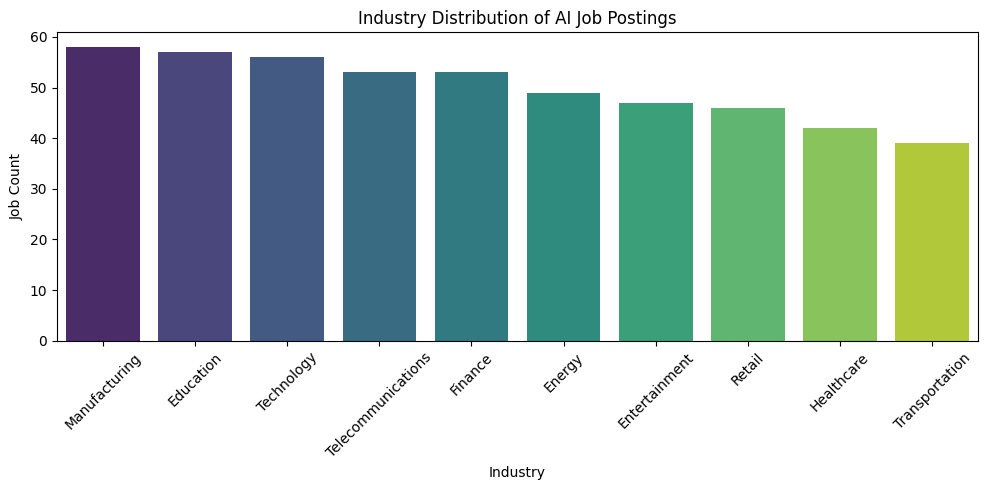

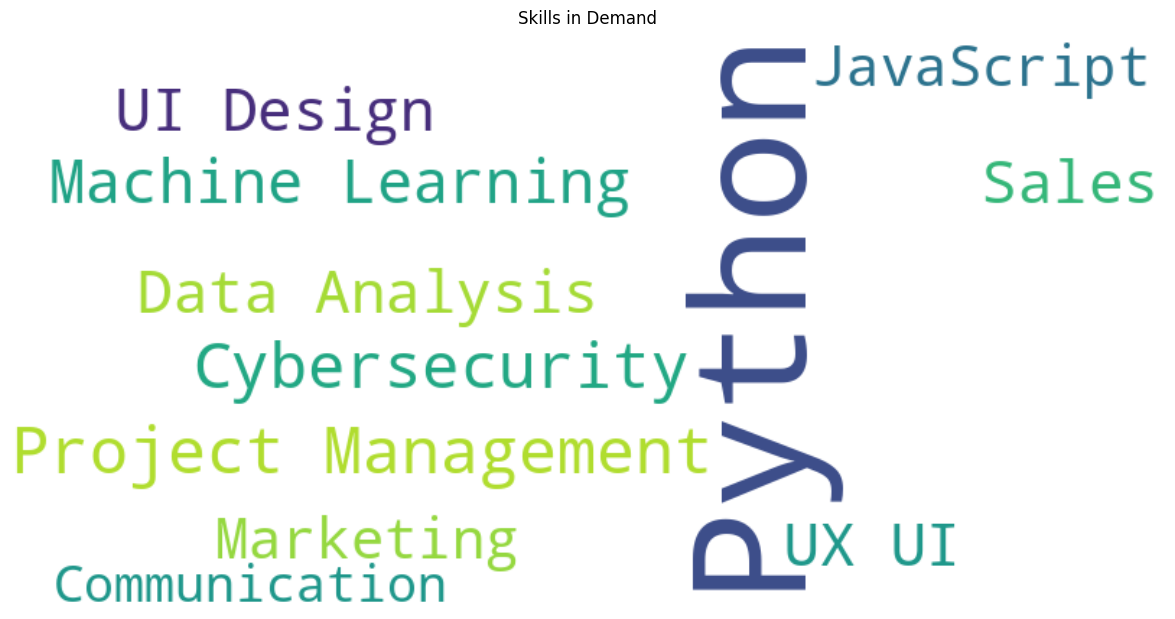

Error: 'latitude' and/or 'longitude' columns missing or contain only null values.
All visualizations complete.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Define available datasets
available_files = {
    "ai_job_market_insights": "Cleaned_ai_job_market_insights.csv",
    "ai_ml_jobs_linkedin": "Cleaned_ai_ml_jobs_linkedin.csv",
    "analysis_ai_adoption": "Cleaned_Analysis_AIAdoption_AutomationRisk.csv",
    "career_change_prediction": "Cleaned_career_change_prediction_dataset.csv",
    "resume_data": "Cleaned_resume_data.csv"
}

# Let the user choose a dataset
print("Available datasets:")
for key in available_files:
    print(f"- {key}")

dataset_choice = input("Enter the dataset key to use: ")
file_name = available_files.get(dataset_choice, "Cleaned_ai_job_market_insights.csv")

# Construct full path
file_path = os.path.join("", file_name)

# Print the file path for debugging
print(f"Looking for file at: {file_path}")

# Check if file exists before attempting to read
if not os.path.isfile(file_path):
    print(f"Error: The file '{file_path}' does not exist.")
    raise SystemExit(f"File not found: {file_path}")

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully from local storage.")
    print("Columns in dataset:", df.columns)
    print(df.head())
except Exception as e:
    print("Error loading dataset from local storage:", e)
    raise SystemExit(e)

# Ensure plots display properly in scripts
plt.ion()

# Adjust column names based on dataset
if "publishedAt" in df.columns:
    df.rename(columns={"publishedAt": "posting_date"}, inplace=True)

# 1. Job Growth Over Time: Line Graph for AI Job Postings Over Time
try:
    if 'posting_date' in df.columns and not df['posting_date'].isnull().all():
        df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
        job_growth = df.groupby(pd.Grouper(key='posting_date', freq='M')).size().reset_index(name='job_count')
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=job_growth, x='posting_date', y='job_count', marker='o')
        plt.title('AI Job Postings Over Time')
        plt.xlabel('Posting Date')
        plt.ylabel('Job Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'posting_date' column missing or contains only null values.")
except Exception as e:
    print("Error in Job Growth Over Time visualization:", e)

# 2. Industry Distribution: Bar Chart of AI Job Postings by Industry
try:
    industry_column = next((col for col in df.columns if 'industry' in col.lower()), None)
    if industry_column and not df[industry_column].isnull().all():
        industry_counts = df[industry_column].value_counts().reset_index()
        industry_counts.columns = ['industry', 'job_count']
        plt.figure(figsize=(10, 5))
        sns.barplot(data=industry_counts, x='industry', y='job_count', palette='viridis')
        plt.title('Industry Distribution of AI Job Postings')
        plt.xlabel('Industry')
        plt.ylabel('Job Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Industry column missing or contains only null values.")
except Exception as e:
    print("Error in Industry Distribution visualization:", e)

# 3. Skills in Demand: Word Cloud from Job Descriptions
try:
    skills_column = next((col for col in df.columns if 'skill' in col.lower()), None)
    if skills_column and not df[skills_column].isnull().all():
        text = ' '.join(df[skills_column].dropna().tolist())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(15, 7.5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Skills in Demand')
        plt.show()
    else:
        print("Error: Skills column missing or contains only null values.")
except Exception as e:
    print("Error in Skills in Demand visualization:", e)

# 4. Geographical Distribution: Scatter plot of job locations (if coordinates available)
try:
    if 'latitude' in df.columns and 'longitude' in df.columns and not df[['latitude', 'longitude']].isnull().all().all():
        plt.figure(figsize=(8, 6))
        plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='red', edgecolors='k')
        plt.title('Geographical Distribution of AI Job Postings')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'latitude' and/or 'longitude' columns missing or contain only null values.")
except Exception as e:
    print("Error in Geographical Distribution visualization:", e)

print("All visualizations complete.")
